In [9]:
import numpy as np
import matplotlib.pyplot as plt

class Simulation:
    def __init__(self, sim_endtime=100., time_increment=1e-3, mass=1., max_thrust=20., gain=[0.36, 40., 8.0999e-4], target_amplitude=10.):
        # simulation configuration
        self.sim_endtime = sim_endtime
        self.time_increment = time_increment

        # rocket properties
        self.rocket_mass = mass
        self.max_thrust = max_thrust
        
        # simulation process parameters
        self.rocket_amplitude = 0.1
        self.rocket_velocity = 0.

        # simulaiton pid process paramters
        self.gain = gain
        self.prev_error = 0.
        self.integral_error = 0.
        self.target_amplitude = target_amplitude
    
    def run(self, plot_status):
        sim_time = np.arange(0., self.sim_endtime, self.time_increment).astype(float)
        amplitude = []
        for time in sim_time:
            rocket_thrust = self._pid_controller(self.rocket_amplitude)
            self._rocket_amplitude(rocket_thrust)
            amplitude.append(self.rocket_amplitude)
        amplitude = np.array(amplitude)
        if plot_status:
            self._simulation_graph(sim_time, amplitude)

    def _rocket_amplitude(self, current_thrust):
        rocket_acceleration = -9.81 + current_thrust/self.rocket_mass
        self.rocket_velocity += rocket_acceleration*self.time_increment
        self.rocket_amplitude += self.rocket_velocity*self.time_increment
    
    # Kp: proportional gain, Ki: integral gain, Kd: derivative gain
    def _pid_controller(self, current_amplitude):
        Kp, Ki, Kd = self.gain
        error = self.target_amplitude - current_amplitude
        derivative_error = (error - self.prev_error)/self.time_increment
        self.integral_error += error*self.time_increment
        pid_output_thrust = Kp*error + Ki*self.integral_error + Kd*derivative_error
        pid_output_thrust = self._clip(pid_output_thrust, self.max_thrust)
        self.prev_error = error
        return pid_output_thrust
    
    def _clip(self, input, max_val):
        if input > max_val:
            return max_val
        else: return input
    
    def _simulation_graph(self, time, amplitude):
        plt.plot(time, amplitude)
        plt.xlabel('Time (t)')
        plt.ylabel('Amplitude (m)')
        plt.title('Amplitude Simulation')
        plt.show()

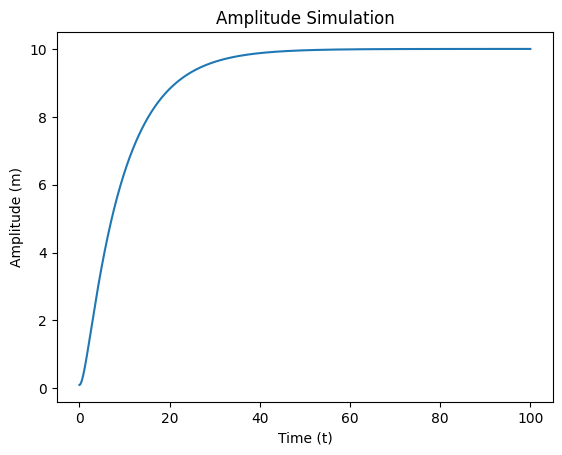

In [16]:
# optimise to decrease time between start and steady state #
# maybe add wind to this simulation #
# we only need wind from above or below #
Kp = 1.1
Kd = 2.
Ki = 0.1
simulation = Simulation(gain=[Kp, Ki, Kd])
plot_status = True
simulation.run(plot_status)